In [0]:
!git clone https://github.com/rslim087a/track
  

fatal: destination path 'track' already exists and is not an empty directory.


In [0]:
!ls track


driving_log.csv  IMG


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random



In [0]:
from imgaug import augmenters as aa

In [0]:
#converter
def path_leaf(cell):
  head,tail = ntpath.split(cell)
  return tail

#original format is C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg	


datadir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns,converters ={
    'center':path_leaf, 'left':path_leaf, 'right':path_leaf
})
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [0]:

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


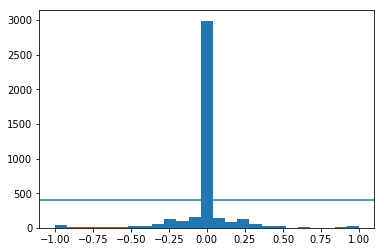

In [0]:
num_bins = 25
samples_per_bin = 400
plt.hist(data['steering'], num_bins)
plt.axhline(samples_per_bin)


In [0]:
hist,bins = np.histogram(data['steering'],num_bins)

#hist has the frequncies of different steering interval 

#bins differnt angles that are broken down into differnt internval like -1 -0.92 .....0.92 1

initial size: 4053
removed: 2590
after removing  : 1463


(array([ 35.,   6.,   6.,   6.,  13.,   8.,  24.,  22.,  53., 131.,  99.,
        158., 400., 137.,  86., 126.,  54.,  22.,  19.,   2.,   9.,   4.,
          4.,   6.,  33.]),
 array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
        -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
         0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ]),
 <a list of 25 Patch objects>)

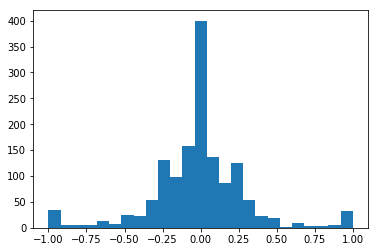

In [0]:
removed_list=[]
for j in range(num_bins):
  list1=[]
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list1.append(i)
      
   
      
  list1=shuffle(list1)
  list12=list1[0:samples_per_bin]
  removed_list.extend(list1[samples_per_bin:])

  
print('initial size:',len(data))
print('removed:',len(removed_list))
data.drop(data.index[removed_list], inplace=True)
print('after removing  :',len(data))
plt.hist(data['steering'], num_bins)


In [0]:
def load_data(datadir,df):
  image_path=[]
  steering=[]
  for i in range(len(data)):
    data_=data.iloc[i]
    center , left , right = data_[0],data_[1],data_[2]
    image_path.append(os.path.join(datadir,center))
    steering.append(float(data_[3]))
  image_paths=np.array(image_path)
  steerings=np.array(steering)
  return image_paths,steerings



image_paths,steerings = load_data(datadir+'/IMG', data )



In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)


In [0]:
print('train: ',len(X_train))
print('test: ',len(X_valid))

train:  1170
test:  293


Text(0.5, 1.0, 'Test')

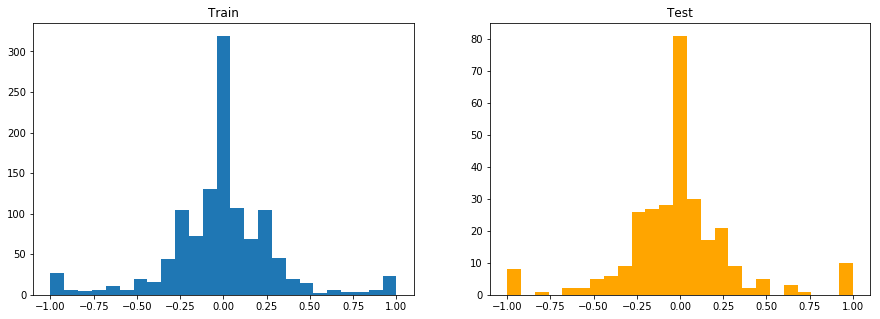

In [0]:
fig , axis = plt.subplots(1,2,figsize=(15,5))
axis[0].hist(y_train, num_bins)
axis[0].set_title('Train')
axis[1].hist(y_valid, num_bins,color='orange',label='Test')
axis[1].set_title('Test')

Text(0.5, 1.0, 'zoomed img')

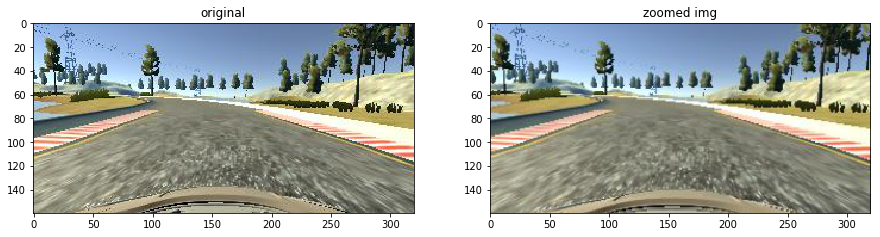

In [0]:
def zoom(image):
  zoom=iaa.Affine(scale=(1,1.3))
  image = zoom.augment_image(image)
  return image


image=mpimg.imread(X_train[10])
original_img=image
preprocessed_image=zoom(image)

fig,axis=plt.subplots(1,2,figsize=(15,5))
axis[0].imshow(original_img)
axis[0].set_title('original')
axis[1].imshow(preprocessed_image)
axis[1].set_title('zoomed img')

Text(0.5, 1.0, 'panned img')

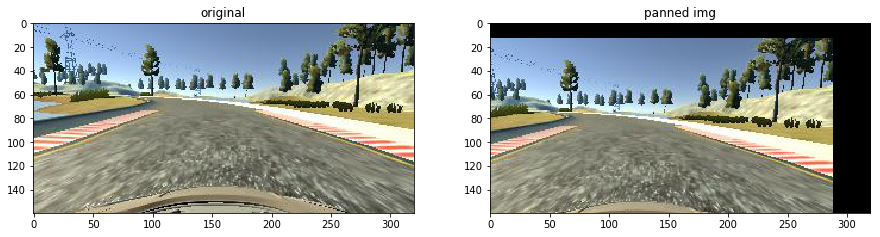

In [0]:
def pan(image):
  pan = iaa.Affine(translate_percent={
      "x" : (-0.1,0.1),
      "y" : (-0.1,0.1)
  })
  image=pan.augment_image(image)
  return image

image=mpimg.imread(X_train[10])
original_img=image
preprocessed_image=pan(image)

fig,axis=plt.subplots(1,2,figsize=(15,5))
axis[0].imshow(original_img)
axis[0].set_title('original')
axis[1].imshow(preprocessed_image)
axis[1].set_title('panned img')

Text(0.5, 1.0, 'brightened or darknned img')

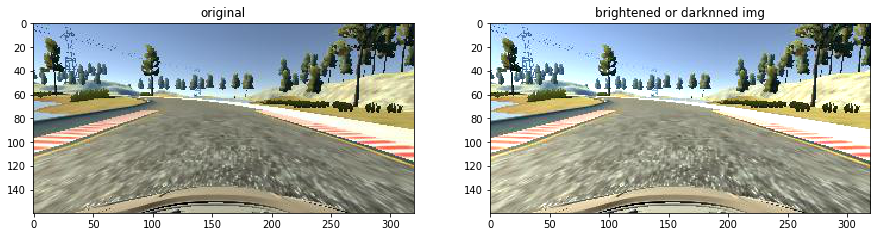

In [0]:
def brightness(image):
  brightness = iaa.Multiply((0.2,1.2))
  image=brightness.augment_image(image)
  return image
  
   
image=mpimg.imread(X_train[10])
original_img=image
preprocessed_image=brightness(image)

fig,axis=plt.subplots(1,2,figsize=(15,5))
axis[0].imshow(original_img)
axis[0].set_title('original')
axis[1].imshow(preprocessed_image)
axis[1].set_title('brightened or darknned img')

Text(0.5, 1.0, 'flipped img 0.05')

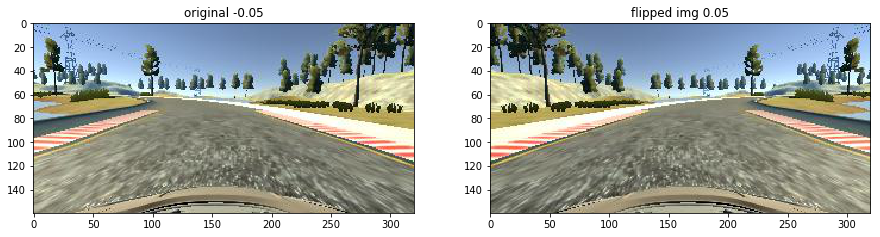

In [0]:
def image_flip(image,steering_angle):
  image=cv2.flip(image,1)
  steering_angle=-steering_angle
  return image,steering_angle


image = mpimg.imread(X_train[10])
original_img = image
preprocessed_image,flipped_steering = image_flip(image,y_train[10])

fig,axis=plt.subplots(1,2,figsize=(15,5))
axis[0].imshow(original_img)
axis[0].set_title('original {}'.format(y_train[10]))
axis[1].imshow(preprocessed_image)
axis[1].set_title('flipped img {}'.format(flipped_steering))

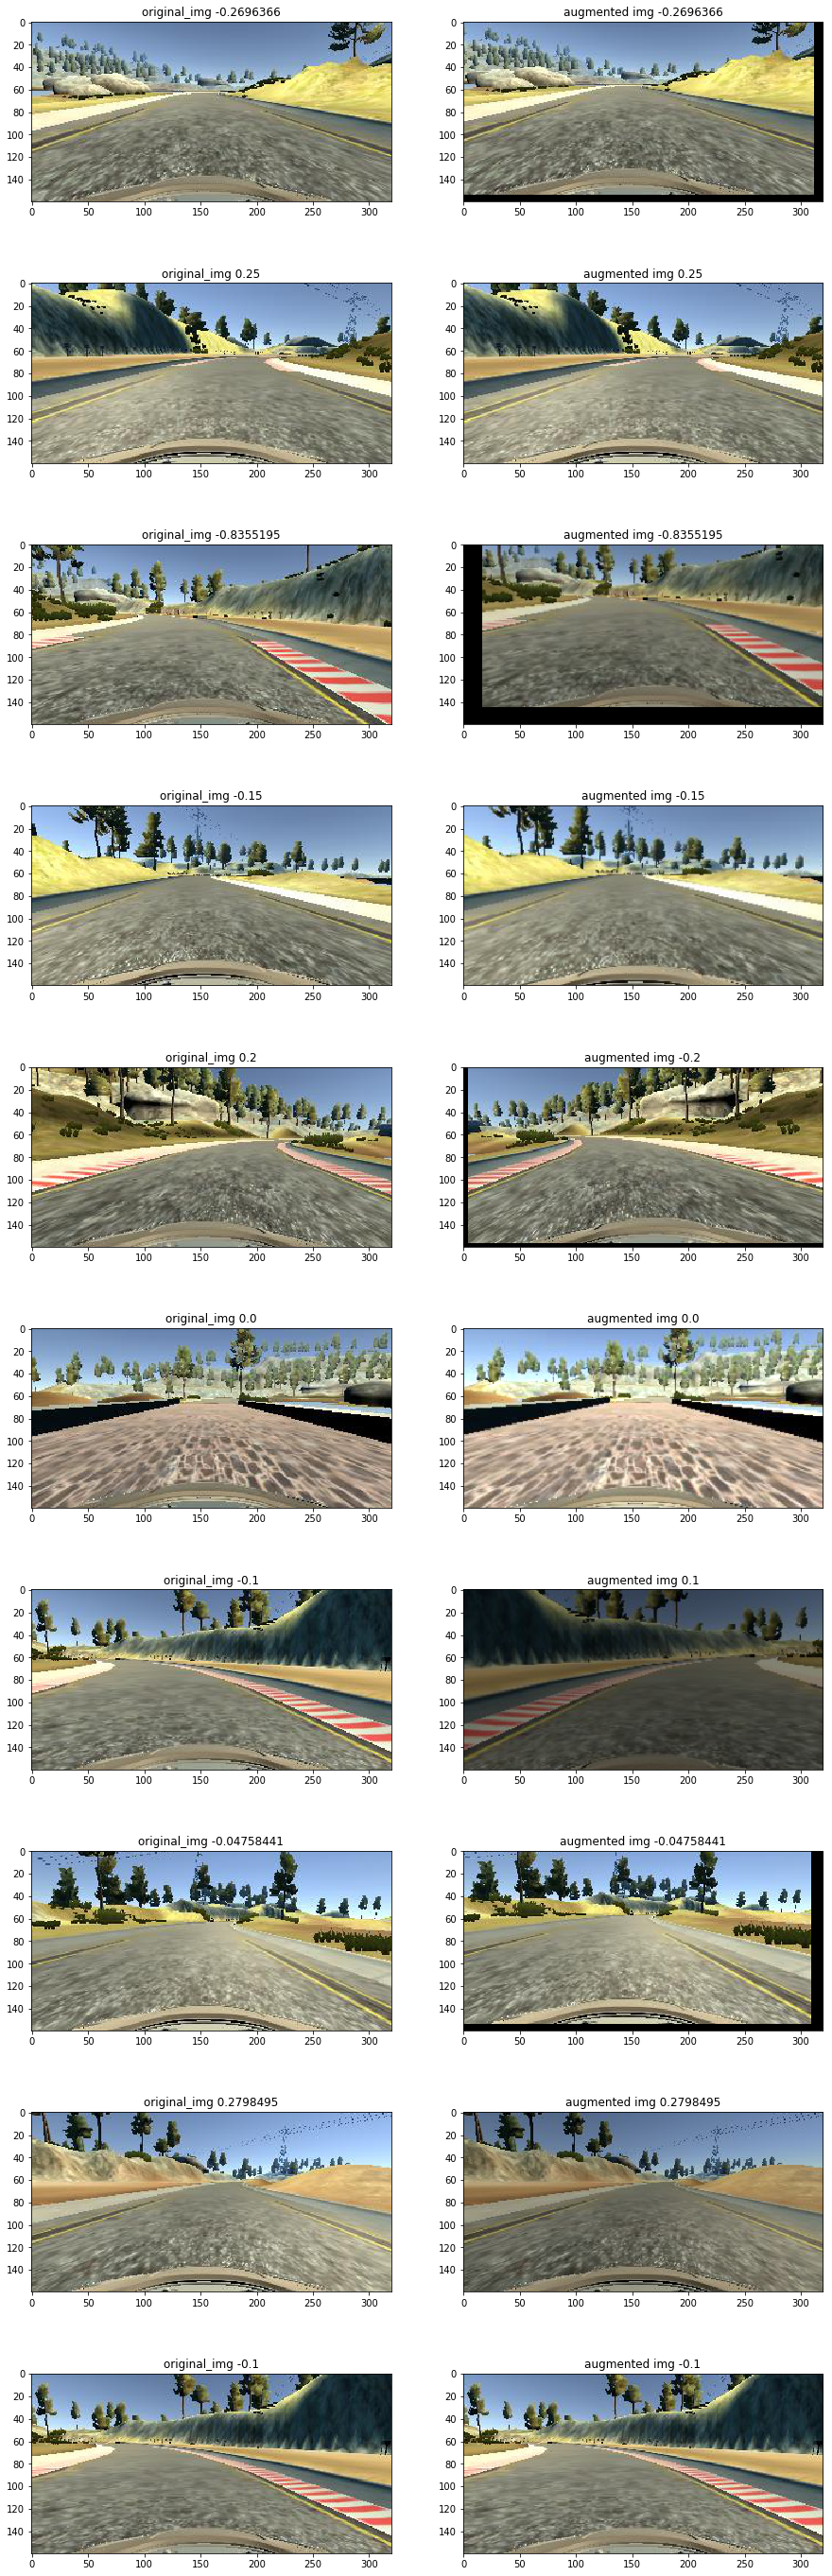

In [0]:
def apply_augment(image,steering_angle):
  if np.random.rand()<0.5:
    image=zoom(image)
  if np.random.rand()<0.5:
    image=brightness(image)
  if np.random.rand()<0.5:
    image,steering_angle=image_flip(image,steering_angle)
  if np.random.rand()<0.5:
    image=pan(image)
  return image,steering_angle

nrows=10
ncolumns=2
fig,axis= plt.subplots(nrows,ncolumns,figsize=(15,50))
for i in range(10):
  randIndex=random.randint(0,len(X_train)-1)
  original_img = mpimg.imread(X_train[randIndex])
  aug_image,aug_steering = apply_augment(original_img,y_train[randIndex])
  
  axis[i][0].imshow(original_img)
  axis[i][0].set_title('original_img {}'.format(y_train[randIndex]))
  
  axis[i][1].imshow(aug_image)
  axis[i][1].set_title('augmented img {}'.format(aug_steering))

Text(0.5, 1.0, 'preprocessed img')

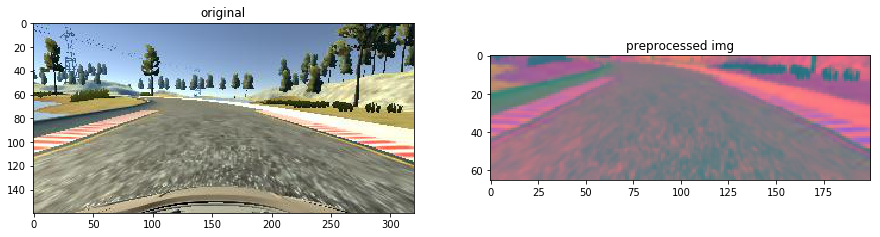

In [0]:
def image_preprocessing(img):
  img=img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img
  

  
image=X_train[10]
original_img=mpimg.imread(image)
preprocessed_image=image_preprocessing(original_img)

fig,axis=plt.subplots(1,2,figsize=(15,5))
axis[0].imshow(original_img)
axis[0].set_title('original')
axis[1].imshow(preprocessed_image)
axis[1].set_title('preprocessed img')

Text(0.5, 1.0, 'Validation Image')

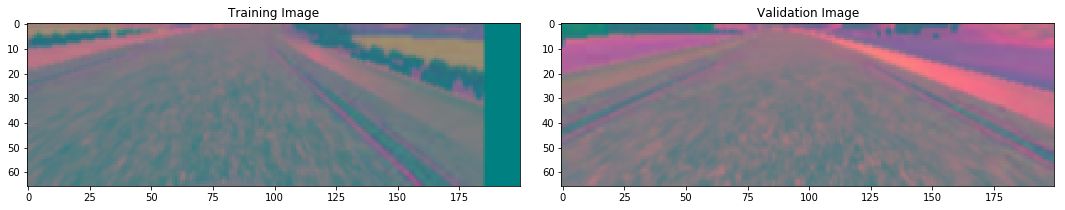

In [0]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = apply_augment(mpimg.imread(image_paths[random_index]), steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = image_preprocessing(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))
      
      
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [0]:
model = Sequential()
model.add(Conv2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
model.add(Conv2D(36, 5, 5, subsample=(2, 2), activation='elu'))
model.add(Conv2D(48, 5, 5, subsample=(2, 2), activation='elu'))
model.add(Conv2D(64, 3, 3, activation='elu'))

model.add(Conv2D(64, 3, 3, activation='elu'))
#model.add(Dropout(0.55))


model.add(Flatten())

model.add(Dense(100, activation = 'elu'))
#   model.add(Dropout(0.5))

model.add(Dense(50, activation = 'elu'))
#   model.add(Dropout(0.5))

model.add(Dense(10, activation = 'elu'))
#model.add(Dropout(0.55))

model.add(Dense(1))

optimizer = Adam(lr=1e-4)
model.compile(loss='mse', optimizer=optimizer)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), act

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               115300    
__________

In [0]:
h = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/10
300/300 [==============================] - 160s 535ms/step - loss: 0.0795 - val_loss: 0.0558
Epoch 2/10
300/300 [==============================] - 155s 518ms/step - loss: 0.0626 - val_loss: 0.0527
Epoch 3/10
300/300 [==============================] - 156s 520ms/step - loss: 0.0570 - val_loss: 0.0503
Epoch 4/10
300/300 [==============================] - 156s 519ms/step - loss: 0.0511 - val_loss: 0.0418
Epoch 5/10
300/300 [==============================] - 157s 522ms/step - loss: 0.0459 - val_loss: 0.0372
Epoch 6/10
300/300 [==============================] - 156s 521ms/step - loss: 0.0424 - val_loss: 0.0335
Epoch 7/10
300/300 [==============================] - 156s 519ms/step - loss: 0.0391 - val_loss: 0.0328
Epoch 8/10
300/300 [==============================] - 155s 518ms/step - loss: 0.0379 - val_loss: 0.0321
Epoch 9/10
300/300 [==============================] - 155s 515ms/step - loss: 0.0367 - val_loss: 0.0307
Epoch 10/10
300/300 [==============================] - 155s 516m

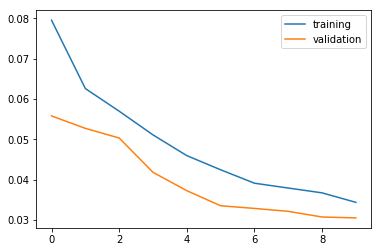

In [0]:
plt.plot(h.history['loss'],label='training')
plt.plot(h.history['val_loss'],label='validation')
plt.legend()



In [0]:
model.save('model.h5')
from google.colab import files 
files.download('model.h5')